In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from tslearn.clustering import TimeSeriesKMeans

C:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv('data.csv')
data = data.reindex(index = data.index[::-1])                                                                
data.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
54862,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54861,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54860,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54859,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54858,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54857,26/03/2020,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54856,27/03/2020,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54855,28/03/2020,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54854,29/03/2020,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
54853,30/03/2020,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [3]:
#Smoothing the short term fluctuation of the curve

def smoothing(the_time_seri, horizon, degree):
    the_list = the_time_seri.values
    the_index = the_time_seri.index
    output_list = savgol_filter(the_list, horizon, degree)
    return  pd.Series( list(output_list) , the_index) 

In [4]:
#Countries' names and populations (thousands)

analyzed_countries = [('Germany', 83166.7), ('France', 67098.8), ('Italy', 60244.6), ('Denmark', 5822.8), 
                     ('Netherlands', 17407.6), ('United_Kingdom', 67025.5), ('Belgium', 11549.9), ('Austria', 8901.1), 
                     ('Switzerland', 8606.0), ('Norway', 5367.6), ('Sweden', 10327.6), ('Iceland', 364.1), ('Czechia', 10693.9)]
                    


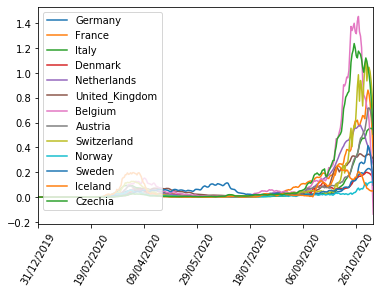

In [5]:
list_of_all_series = []   #Initializing list of all time series of Covid 19 cases to population

for country, population in analyzed_countries:
    the_country_data = data[data['countriesAndTerritories'] == country]
    case_to_population = pd.Series(list(the_country_data['cases'] / population), index = list(the_country_data['dateRep']))
    list_of_all_series.append(smoothing(case_to_population, 11, 2))
    smoothing(case_to_population, 11, 2).plot(label = country)
    plt.xticks(rotation = 60) ;
    plt.legend(loc = 'upper left')

plt.savefig('case_to_population.png')

In [6]:
model = TimeSeriesKMeans(n_clusters=4, metric="dtw", max_iter=50, random_state=0)

In [7]:
belongness = model.fit_predict(list_of_all_series)
belongness

array([3, 2, 2, 3, 2, 3, 0, 2, 0, 3, 3, 1, 0], dtype=int64)

In [8]:
cluster0 = []
cluster0_countries=[]

cluster1 = []
cluster1_countries=[]

cluster2 = []
cluster2_countries=[]

cluster3 = []
cluster3_countries=[]


for index, time_series in enumerate(list_of_all_series):
    
    if(belongness[index] == 0):
        cluster0.append(time_series)
        country_name, _ =analyzed_countries[index]
        cluster0_countries.append(country_name)
        
    if(belongness[index] == 1):
        cluster1.append(time_series) 
        country_name, _ =analyzed_countries[index]
        cluster1_countries.append(country_name)
        
    if(belongness[index] == 2):
        cluster2.append(time_series)  
        country_name, _ =analyzed_countries[index]
        cluster2_countries.append(country_name)

    if(belongness[index] == 3):
        cluster3.append(time_series)   
        country_name, _ =analyzed_countries[index]
        cluster3_countries.append(country_name)

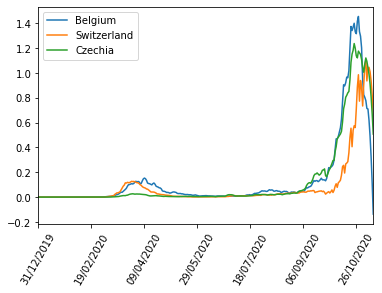

In [9]:
for index, time_series in enumerate(cluster0):
    time_series.plot(label = cluster0_countries[index])
    plt.legend()
    plt.xticks(rotation = 60) ;


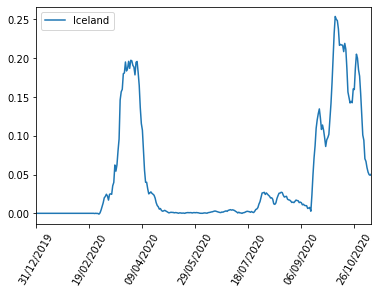

In [10]:
for index, time_series in enumerate(cluster1):
    time_series.plot(label = cluster1_countries[index])
    plt.legend()
    plt.xticks(rotation = 60) ;

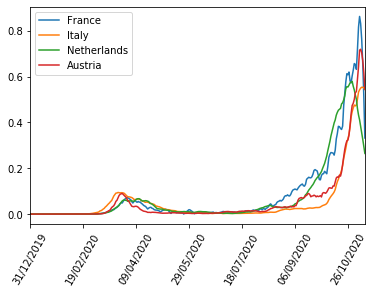

In [11]:
for index, time_series in enumerate(cluster2):
    time_series.plot(label = cluster2_countries[index])
    plt.legend()
    plt.xticks(rotation = 60) ;

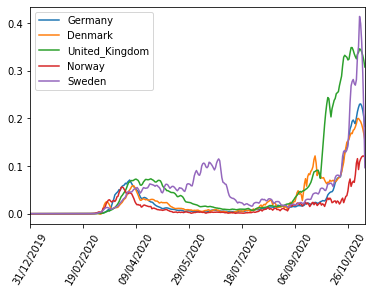

In [12]:
for index, time_series in enumerate(cluster3):
    time_series.plot(label = cluster3_countries[index])
    plt.legend()
    plt.xticks(rotation = 60) ;